# Using K-Nearest Neighbors Classification Algorithm to Analyse Cleveland Heart Disease Data 

### DSCI100 Project Report - Group 36
By Michael Guo, Zaina Kamran, Kerie Galvez, and Ci Xu



## Introduction

Heart diseases refer to several types of conditions that affect the heart of an individual. For instance, one of the most common types of heart disease include the coronary artery disease (CAD), which is caused by a buildup of plaque of cholesterol deposits and other substances in the arteries. This buildup causes the diameters of arteries to narrow overtime, blocking blood flow to the heart. Lack of blood flow can also lead to serious life-threatening events, including heart attacks and eventually death<sup>1</sup>. 
In this project, we created a classification model to determine if we can accurately predict the presence of heart disease within individuals by using the “Heart Disease Data Set” taken from UCI Machine Learning Repository<sup>2</sup>. The data originally contains 76 attributes from 282 subjects from Cleveland, but past published experiments have narrowed it down to a subset of 14 crucial variables. The data set used in this project will be similarly subsetting select variables shown below, containing notable variables such as age, resting heart rate, resting systolic blood pressure, serum cholesterol, number of years as a smoker, and an indicator variable detailing the presence of heart disease.


## Methods & Results

From the 14 crucial variables, the ages and resting heart rates of each subject was chosen to be the two predictor variables used in the analysis. The age variable was chosen due to many concerns that elderly ages may be linked to a higher chance or severity of heart disease. According to Memorial Hermann, over 80 percent of those who die from heart disease are over the age of 65<sup>3</sup>. The variable of resting heart rate was also chosen to be another predictor variable due to its potential link with heart disease. A study conducted at the Women’s Health Initiative found that those with higher resting heart rates were 26 percent more likely to suffer from a heart attack compared to those with lower resting heart rates<sup>4</sup>. The response variable chosen was the indication of the presence of heart disease. 

The analysis involves tuning a K-Nearest Neighbors Classification Model, then using the tuned model to predict observations, and then finally evaluating its accuracy. Using a variety of libraries, the data was wrangled, processed, and visualized thoroughly to achieve a conclusive assessment, as shown below.


### Loading Libraries

The libraries "repr", "tidyverse", and "tidymodels" were used for the data analysis and visualization. A seed was also set to guarantee reproducible results. Table visualizations were limited to 6 rows to help with tidy visualizations.

In [1]:
library(repr)
library(tidyverse)
library(tidymodels)
set.seed(36)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

### Loading Data from the Web

The data was pulled from a GitHub repository (directly accessible from a URL). 

In [2]:
# URL of the Data Source
heart_data_url <- "https://raw.githubusercontent.com/MangoMajestic/dsci100_group_project_data/main/cleveland_crucial_data.csv"

# Reading in the Data into a Data Frame
heart_data <- read_csv(heart_data_url)

Parsed with column specification:
cols(
  age = col_double(),
  sex = col_double(),
  chest_pain = col_double(),
  rest_blood_pres = col_double(),
  serum_cholestorol = col_double(),
  fast_blood_sugar = col_double(),
  rest_elec_res = col_double(),
  rest_heart_rate = col_double(),
  max_heart_rate = col_double(),
  exer_angina = col_double(),
  dep_exer = col_double(),
  peak_exer_slope = col_double(),
  flouro_vess = col_double(),
  thal = col_double(),
  smoke_years = col_double(),
  num = col_double()
)



### Data Wrangling and Cleaning

Multiple variables were converted to categorical types, as specified in the original source of description<sup>2</sup>. The response variable, "disease", indicates the presence or absence of heart disease in each of the 282 patients. The data was further processed to only contain the two predictor variables and the response variable, as specified above.

The data was split into respective training and testing sets, with 75% of the observations being placed into the training set to give the algorithm an ample amount of information to construct and tune the model.

In [3]:
# Wrangling and Processing the Data
heart_processed_data <- heart_data %>%
    mutate(sex = as.factor(sex),
          chest_pain = as.factor(chest_pain),
          fast_blood_sugar = as.factor(fast_blood_sugar),
          rest_elec_res = as.factor(rest_elec_res),
          exer_angina = as.factor(exer_angina),
          peak_exer_slope = as.factor(peak_exer_slope),
          thal = as.factor(thal),
          disease = as.factor(ifelse(num==0,"Absence","Presence"))) %>%
    select(age,rest_heart_rate,disease) 

# Splitting the Data into Training and Testing Sets
heart_split <- heart_processed_data %>%
    initial_split(prop = 0.75, strata = disease)

# Assigning the Training and Testing Data repectively to the variables heart_train and heart_test
heart_train <- training(heart_split)
heart_test <- testing(heart_split) 

### Summary Statistics of Training Data

First, the proportion of training data observations with and without heart disease is obtained and displayed. Then, the number and percentage of missing values is also displayed, showing there is no missing data.

In [4]:
# Saving the Number of Observations into a Variable
num_obs <- nrow(heart_train)

# Number & Percent of Observations, Grouped by Patients With and Without Heart Disease
heart_percent_obs <- heart_train %>%
    group_by(disease) %>%
    summarize(Count=n(),Percentage=n()/num_obs*100)

# Displaying the Summary
fig_1 <- list()
fig_1[[1]] <- "Figure 1: Counts and Proportions of Observations with and without Heart Disease"
fig_1[[2]] <- heart_percent_obs %>%
    rename(Disease = disease)
fig_1

# Number of Rows with Missing Values
heart_NA <- heart_train %>%
    filter(is.na(age)|is.na(rest_heart_rate)|is.na(disease)) %>%
    summarize(Count=n(),Percentage=n()/num_obs*100)

# Displaying the Summary of Missing Values:
fig_2 <- list()
fig_2[[1]] <-"Figure 2: Counts and Proportions of Observations with Missing Data"
fig_2[[2]] <- heart_NA
fig_2

`summarise()` ungrouping output (override with `.groups` argument)



Disease,Count,Percentage
<fct>,<int>,<dbl>
Absence,118,55.66038
Presence,94,44.33962


Count,Percentage
<int>,<dbl>
0,0


### Exploratory Visualization

The observations in the training data were plotted to depict the spread of the two categories of the response variable. The orange circular points depict the observations without heart disease, and the blue triangular points depict the observations with heart disease.

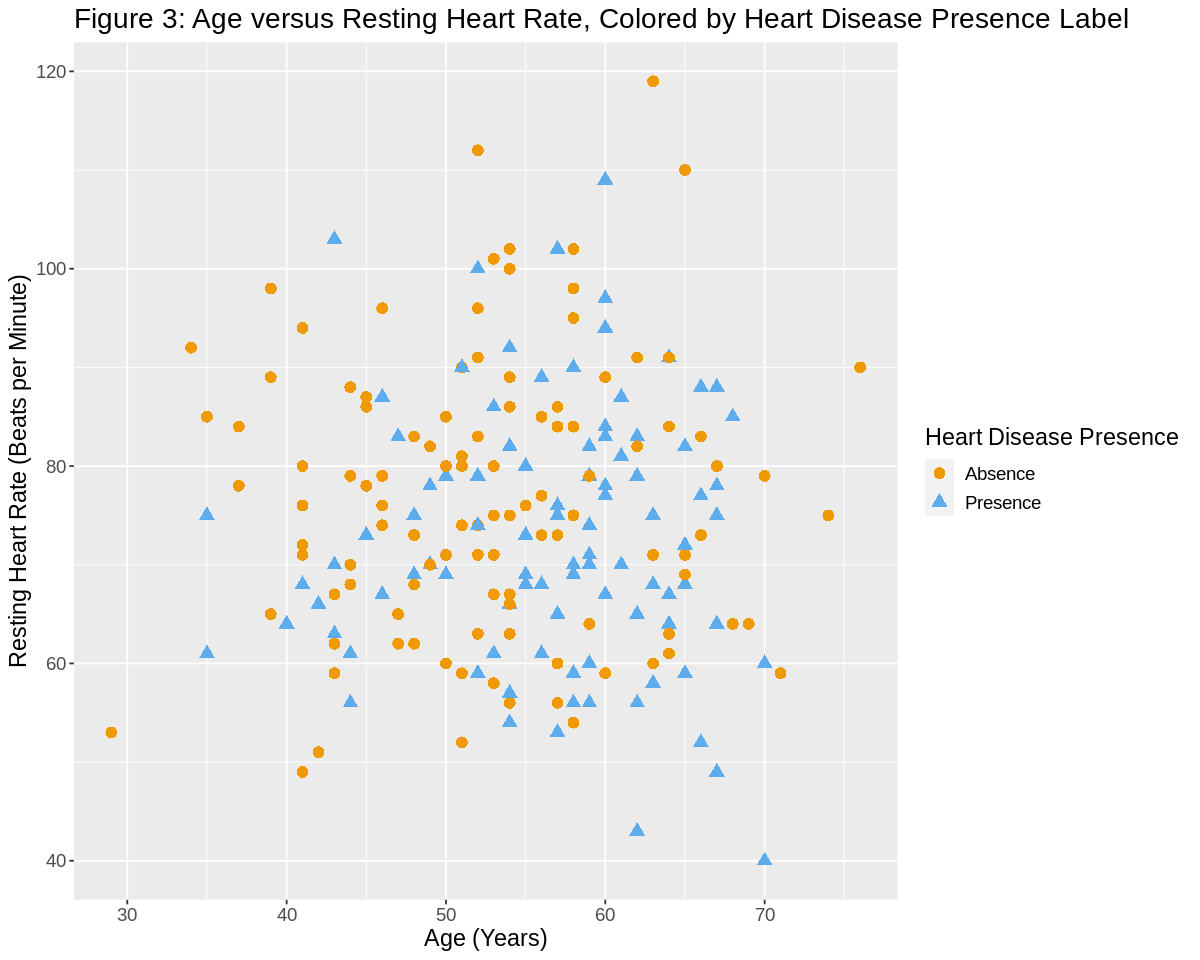

In [5]:
# Setting Visualization Plot Size
options(repr.plot.width = 10, repr.plot.height = 8)

# Plotting the Training Data, Colour Coding the Patients With and Without Heart Disease
heart_train_plot <- heart_train %>%
    ggplot(aes(x=age,y=rest_heart_rate,color=disease,shape=disease)) +
    geom_point(size=3) +
    labs(x="Age (Years)",y="Resting Heart Rate (Beats per Minute)",color="Heart Disease Presence",shape="Heart Disease Presence") +
    scale_color_manual(values=c("orange2","steelblue2")) +
    ggtitle("Figure 3: Age versus Resting Heart Rate, Colored by Heart Disease Presence Label") +
    theme(text = element_text(size=14))

# Displaying the Plot
heart_train_plot

### Data Analysis and Visualization

Cross-validation was used to help build and tune the model, to pick the most optimal K-value to use. A plot of K-values and their respective resulting accuracies is shown to display how well each value performs in the analysis.

Warning message:
“`step_upsample()` is deprecated as of recipes 0.1.13.
Please use `themis::step_upsample()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


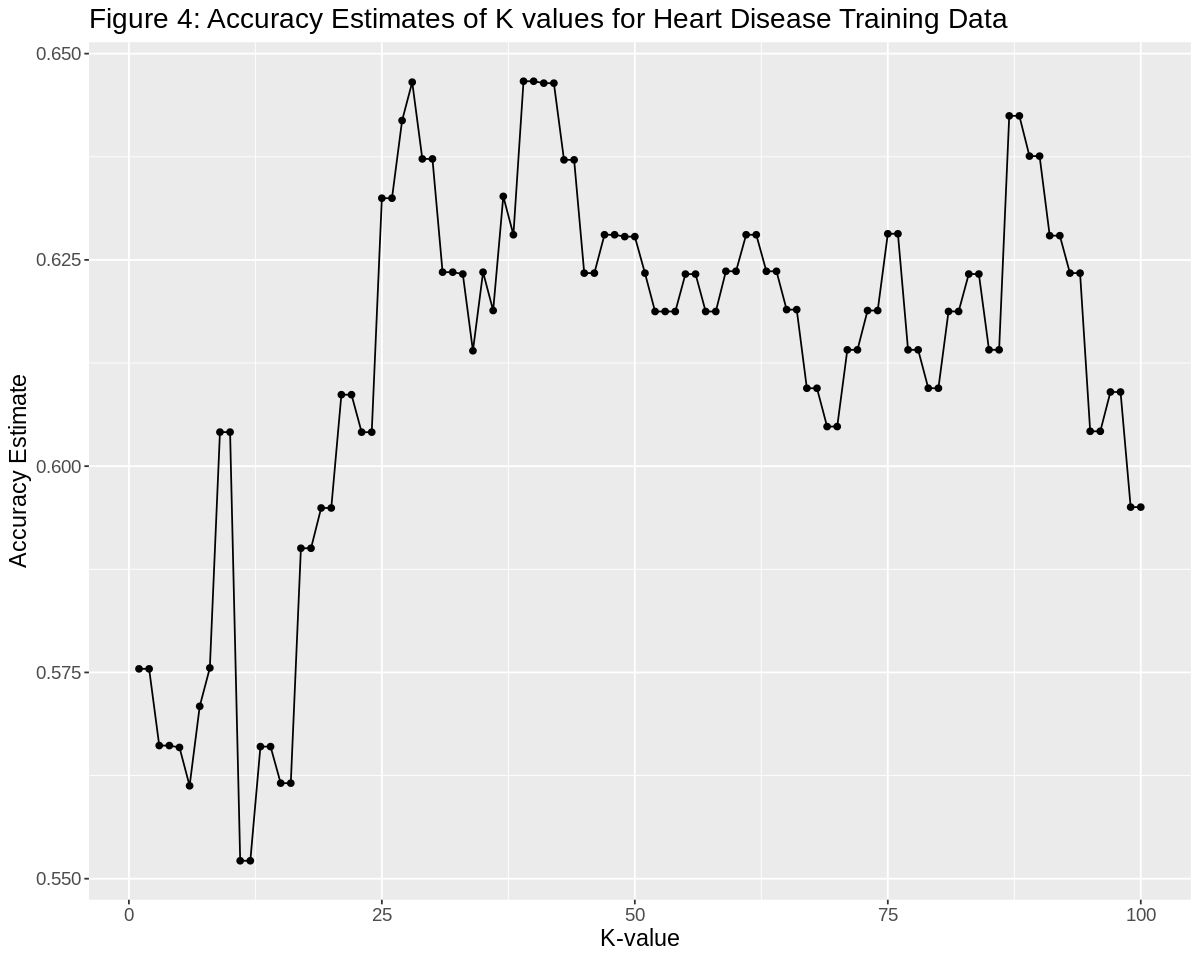

In [6]:
### Using Cross-Validation to find the optimal K value

# Dividing the Training Set into 5 equal parts, with balanced amounts of presence and absence on heart disease
heart_train_vfold <- vfold_cv(heart_train, v=5, strata = disease)

# Scaling, Centering, and Balancing Data with a Recipe
processing_recipe <- recipe(disease~., data = heart_train) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors()) %>%
    step_upsample(disease, over_ratio = 1)

# Specifying the K-Nearest-Neighbors Classification Model, preparing to tune and assess values of K
knn_spec_vfold <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
    set_engine("kknn") %>%
    set_mode("classification")

# Using all the above to calculate accuracies for models of different K values, from 1 to 100.
accuracies_estimates <- workflow() %>%
    add_recipe(processing_recipe) %>%
    add_model(knn_spec_vfold) %>%
    tune_grid(resamples = heart_train_vfold, grid = tibble(neighbors = seq(from=1,to=100,by=1))) %>%
    collect_metrics() %>%
    filter(.metric == "accuracy") %>%
    select(neighbors,.metric,.estimator,mean,std_err)

# Plotting the accuracies versues their respective K values
cross_val_plot <- accuracies_estimates %>%
    ggplot(aes(x=neighbors,y=mean)) +
        geom_point() +
        geom_line() +
        labs(x="K-value",y="Accuracy Estimate") +
        ggtitle("Figure 4: Accuracy Estimates of K values for Heart Disease Training Data") +
        theme(text = element_text(size = 14))
cross_val_plot

# Extracting the optimal K value (i.e. the one with the highest accuracy)
optimal_k <- accuracies_estimates %>%
    filter(mean == max(mean)) %>%
    slice(1) %>%
    select(neighbors) %>%
    pull()

The optimal K value was then used to predict the presence of heart disease in the observations in the testing data. The table printed shows the accuracy of the resulting analysis.

In [7]:
### Performing K Nearest Neighbours Clafficiation on the Testing Set

# Specifying the Model using the optimal K value found using Cross-Validation
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = optimal_k) %>%
    set_engine("kknn") %>%
    set_mode("classification")

# Fitting the Model to the Training Data
model_fit <- workflow() %>%
    add_recipe(processing_recipe) %>%
    add_model(knn_spec) %>%
    fit(data = heart_train)

# Predicting Values using the Testing Data
model_predictions <- predict(model_fit, heart_test) %>%
    bind_cols(heart_test)

# Pulling out Metrics to Assess Model Accuracy
pred_metrics <- model_predictions %>%
    metrics(truth = disease, estimate = .pred_class) %>%
    filter(.metric == "accuracy")

# Displaying the Accuracy Results
fig_5 <- list()
fig_5[[1]] <- "Figure 5: Results of the Classifier Accuracy (Shown as Percentage)"
fig_5[[2]] <- pred_metrics %>%
    mutate(Accuracy = .estimate*100) %>%
    select(Accuracy)
fig_5

Accuracy
<dbl>
60


A scatter plot visualization was additionally constructed to illustrate the classifier's decisions across the ranges of values of the two predictor variables. The background colour indicates the classifier's prediction of heart disease for any new observation within the range of the plot's area.

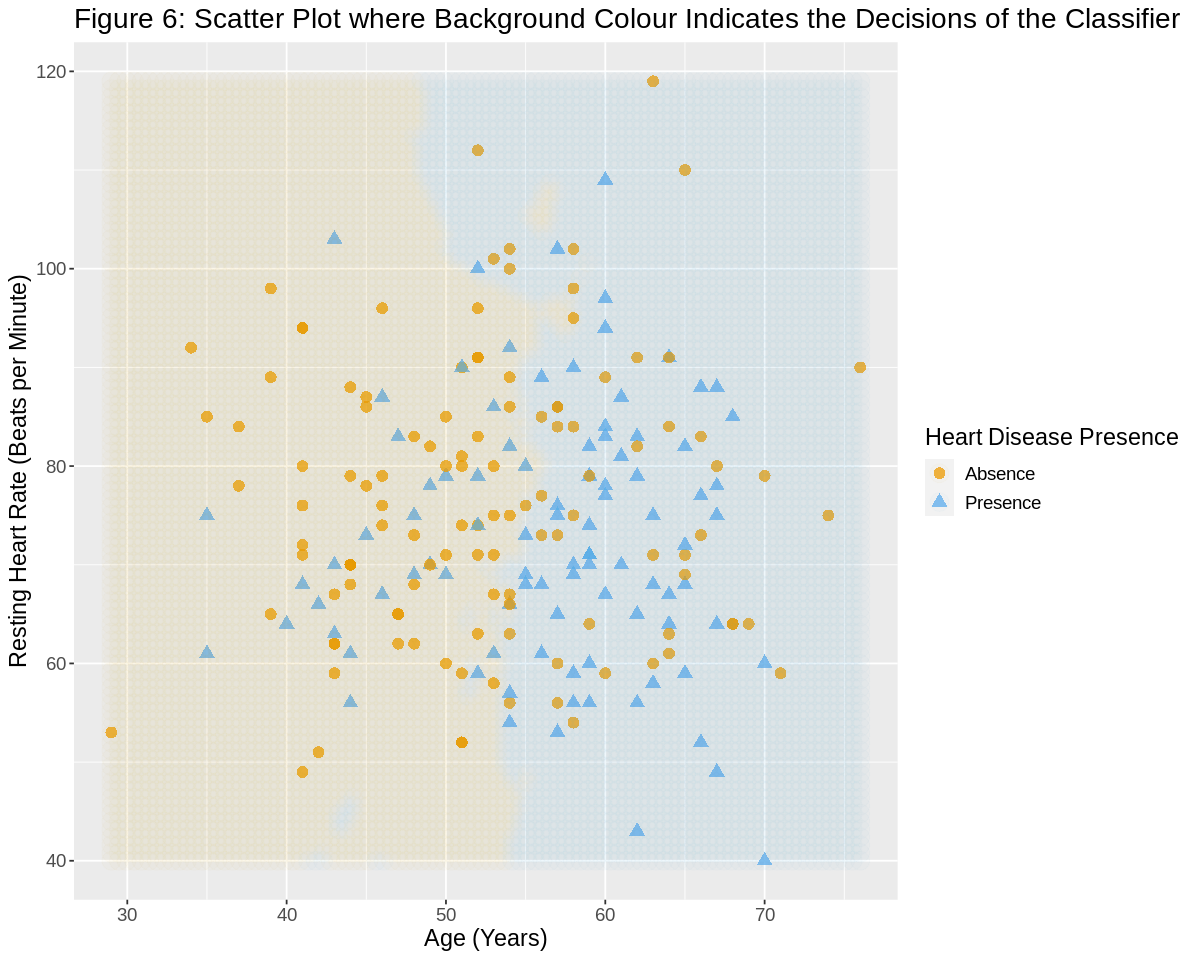

In [8]:
# Color Prediction Map Visualization
x_grid <- seq(min(heart_train$age),max(heart_train$age),length.out = 100)
y_grid <- seq(min(heart_train$rest_heart_rate),max(heart_train$rest_heart_rate),length.out = 100)
asgrid <- as_tibble(expand_grid(age = x_grid, rest_heart_rate = y_grid))
knnPredGrid <- predict(model_fit, asgrid)
prediction_table <- bind_cols(knnPredGrid, asgrid) %>%
    rename(disease = .pred_class)
wkflw_plot <- ggplot() +
    geom_point(data = heart_train, mapping = aes(x=age,y=rest_heart_rate,color=disease,shape=disease), alpha=0.75, size = 3) +
    labs(shape = "Heart Disease Presence") +
    geom_point(data = prediction_table, mapping = aes(x=age,y=rest_heart_rate,color=disease), alpha = 0.02, size = 5) +
    labs(x="Age (Years)",y="Resting Heart Rate (Beats per Minute)", color = "Heart Disease Presence") +
    ggtitle("Figure 6: Scatter Plot where Background Colour Indicates the Decisions of the Classifier") +
    scale_color_manual(values=c("orange2","steelblue2")) +
    theme(text = element_text(size = 14))
wkflw_plot

## Discussion

Through Figure 5, the classifier results show that it is accurate 60% of the time, rendering this classifier weak. This is only slightly better than predicting using the majority label as shown in Figure 1, where 55% of the training data observations do not show the presence of heart disease. Therefore, this model barely provides any more information. This weak accuracy is foreshadowed in the exploratory visualisation. In Figure 3 there is no clear trend for observations with and without heart disease, as they appear very intermingled with one another. As a result, it can be difficult for the classifier to assess and predict the presence of heart disease in any new observations, as shown in the low accuracy result. This can be further seen during the cross-validation portion of the analysis. Figure 4 shows the volatility of the accuracies with their respective K-values, which may also be strongly influenced by the “intermingling” of data points. The vast majority of the classifier's predictions will include roughly equal amounts of “votes” for both the presence and absence of heart disease. This lowers accuracy results, as there is seldom a clear or overwhelming “majority”, but instead the classifier will face lots of noise caused by so many observations with conflicting labels. The indicator graph, Figure 6, also illustrates the weakness of the classifier. Many points can be seen residing in a region that is oppositely coloured, which shows the classifier’s inability to accurately predict the presence of heart disease in most observations.

We hypothesized that heart disease would be diagnosed more likely in more elderly patients, as well as patients with higher resting heart rates. Therefore, in our analysis, we expected a high classification accuracy using these two predictor variables. However, our classifier provided very limited results, which shows that, of the collected observations, there is a very weak correlation between the presence of heart disease and the age and resting heart rates of the patients. This shows that our initial hypothesis of a strong correlation is incorrect, and further studies need to be done to predict and assess heart disease presence among patients.

While this analysis shows highly limited results, further studies can be done with respect to other predictor variables, as well as using more observations that are not only limited to Cleveland, to confirm our classifier’s weak results and to identify stronger predictor variables that indicate heart disease presence. Furthermore, other algorithms outside of K-nearest neighbors can be used to construct and evaluate models, using other methods of learning to gain more information from the data and future collected data.

Future research could explore other factors that may impact the causation of heart diseases. While age and resting heart rate show little effect on predicting heart disease presence, other questions of correlation and causality using other factors and variables can be discussed, leading to more accurate identification to the contributors of fatal heart diseases.


## References

1. Centers for Disease Control and Prevention. (2021, January 19). Heart disease. Centers for Disease Control and Prevention. Retrieved November 6, 2021, from https://www.cdc.gov/heartdisease. 

2. UCI Machine Learning Repository: Heart disease data set. (n.d.). Retrieved October 25, 2021, from https://archive.ics.uci.edu/ml/datasets/Heart+Disease. 

3. Heart disease & age. memorialhermann. (2021, October 15). Retrieved December 3, 2021, from https://memorialhermann.org/services/specialties/heart-and-vascular/healthy-living/education/heart-disease-and-age. 

4. Hsia, J., Larson, J. C., Ockene, J. K., Sarto, G. E., Allison, M. A., Hendrix, S. L., ... & Manson, J. E. (2009). Resting heart rate as a low tech predictor of coronary events in women: prospective cohort study. Bmj, 338. https://doi/10.1136/bmj.b219 



Data Set: https://archive.ics.uci.edu/ml/datasets/Heart+Disease Retrieved October 25, 2021
